![alt text](1a7d78_9c68b18903594b20acf84ec2c1781715_mv2.webp "Title")

IMPORT MODULES

In [403]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

LOAD DATASET

In [404]:
df = pd.read_csv('loan_train.csv')
df1 = pd.read_csv('Loan_test.csv')


In [405]:
#train
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [406]:
#test dataset
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [407]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [408]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Preprocessing Dataset

In [409]:
#find null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [410]:
#fill missing values with mean numberical values
df.fillna(df.mean(), inplace=True)

In [411]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [412]:
df['Gender'].mode()[0]

'Male'

In [413]:
#fill the missing cateforical terms with mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [414]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

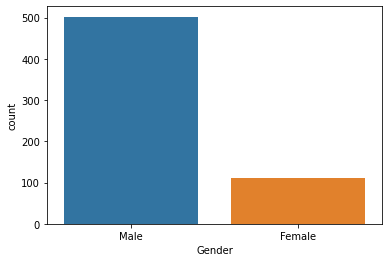

In [415]:
#categorical visualisation
sns.countplot(x='Gender' ,data=df)

<AxesSubplot:xlabel='Married', ylabel='count'>

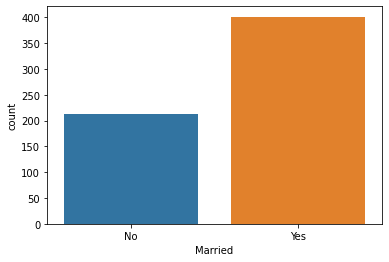

In [416]:
sns.countplot(x='Married', data=df)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

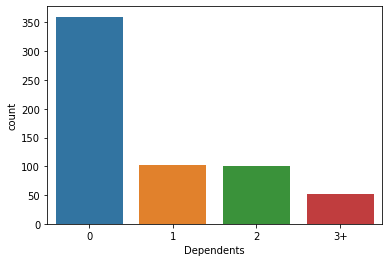

In [417]:
sns.countplot(x='Dependents', data=df)

<AxesSubplot:xlabel='Education', ylabel='count'>

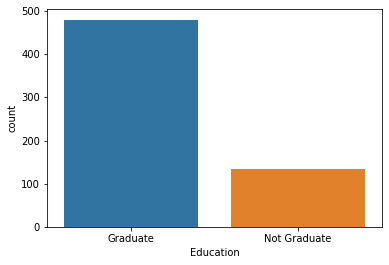

In [418]:
sns.countplot(x='Education', data=df)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

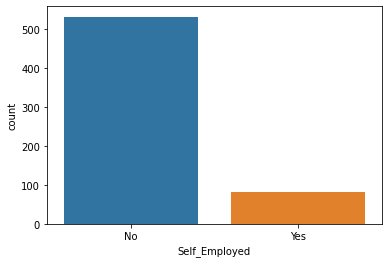

In [419]:
sns.countplot(x='Self_Employed', data=df)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

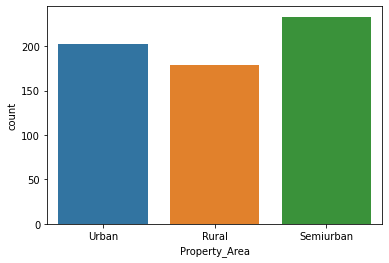

In [420]:
sns.countplot(x='Property_Area', data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

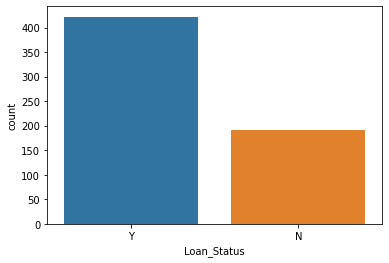

In [421]:
sns.countplot(x='Loan_Status', data=df)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

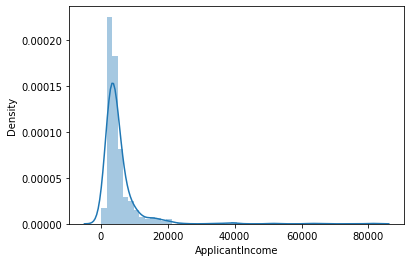

In [422]:
#numerical visualisation
sns.distplot(df['ApplicantIncome'])

In [423]:
# #apply log transformation to ApplicantIncome
# df['ApplicantIncome'] = np.log(df['ApplicantIncome'])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

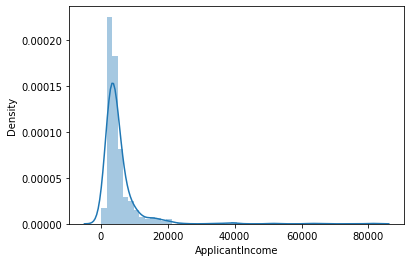

In [424]:
sns.distplot(df['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

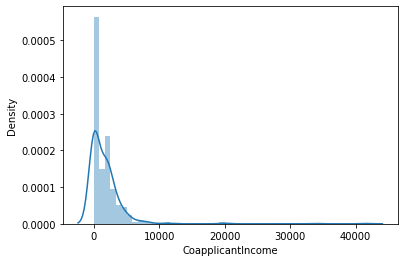

In [425]:
sns.distplot(df['CoapplicantIncome'])

In [426]:
# #apply log transformation to CoapplicantIncome
# df['CoapplicantIncome'] = np.log(df['CoapplicantIncome'])
# if df['CoapplicantIncome'].isnull().any():
#     df['CoapplicantIncome'] = df['CoapplicantIncome'].fillna(df['CoapplicantIncome'].mean())

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

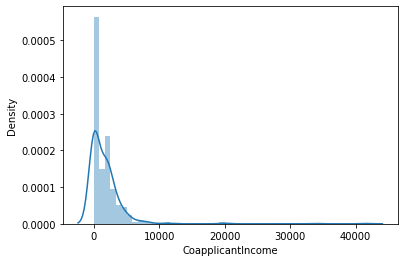

In [427]:
sns.distplot(df['CoapplicantIncome'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

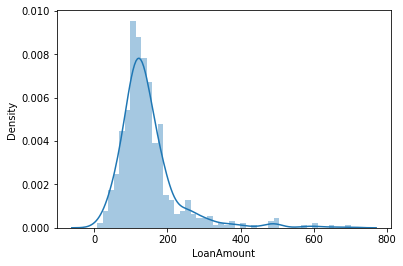

In [428]:
sns.distplot(df['LoanAmount'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

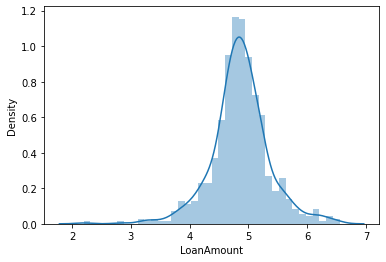

In [429]:
df['LoanAmount'] = np.log(df['LoanAmount'])
sns.distplot(df['LoanAmount'])

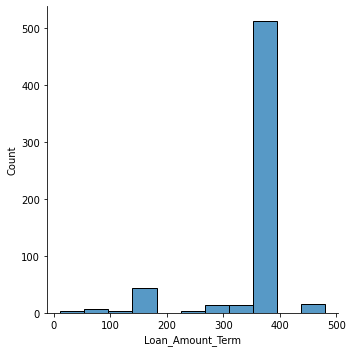

In [430]:
sns.displot(df['Loan_Amount_Term'])

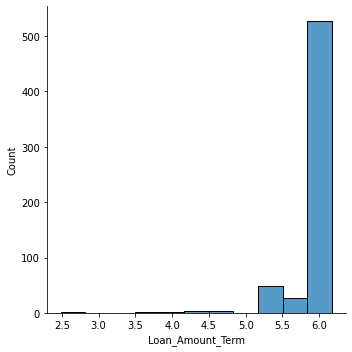

In [431]:
df['Loan_Amount_Term'] = np.log(df['Loan_Amount_Term'])
sns.displot(df['Loan_Amount_Term'])


<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

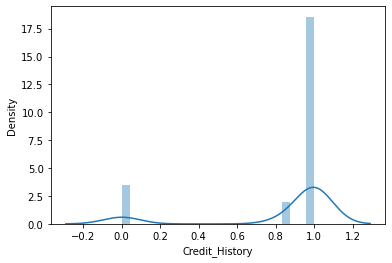

In [432]:
sns.distplot(df['Credit_History'])

#creation of new attributes


In [433]:
#total income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,4.986426,5.886104,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,4.852030,5.886104,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,4.189655,5.886104,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,4.787492,5.886104,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,4.948760,5.886104,1.0,Urban,Y,6000.0


<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

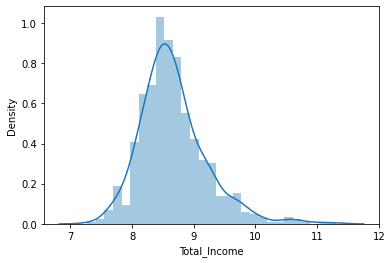

In [434]:
#apply log transformation to Total_Income
df['Total_Income'] = np.log(df['Total_Income'])
sns.distplot(df['Total_Income'])


<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Density'>

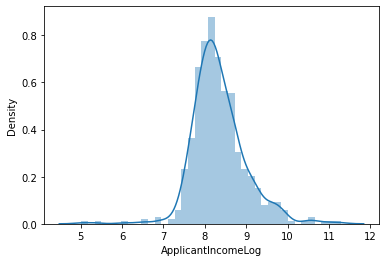

In [435]:
# apply log transformation to the attribute
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome']+1)
sns.distplot(df["ApplicantIncomeLog"])

<AxesSubplot:xlabel='CoapplicantIncomeLog', ylabel='Density'>

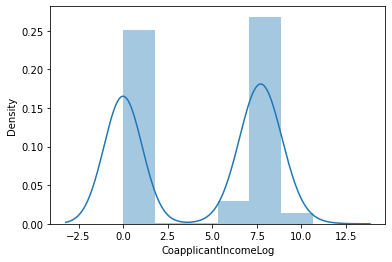

In [436]:
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome']+1)
sns.distplot(df["CoapplicantIncomeLog"])

<AxesSubplot:xlabel='LoanAmountLog', ylabel='Density'>

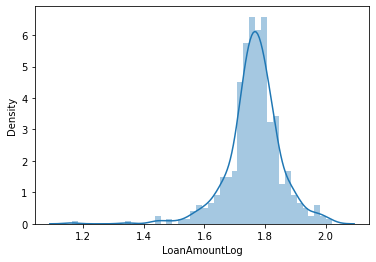

In [437]:
df['LoanAmountLog'] = np.log(df['LoanAmount']+1)
sns.distplot(df["LoanAmountLog"])

<AxesSubplot:xlabel='Loan_Amount_Term_Log', ylabel='Density'>

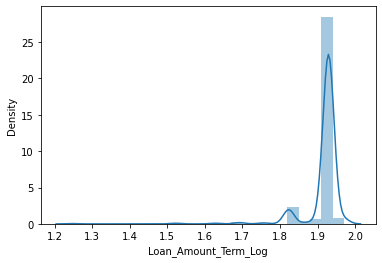

In [438]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term']+1)
sns.distplot(df["Loan_Amount_Term_Log"])

<AxesSubplot:xlabel='Total_Income_Log', ylabel='Density'>

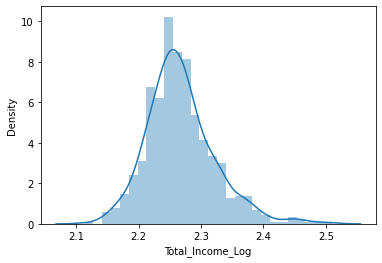

In [439]:
df['Total_Income_Log'] = np.log(df['Total_Income']+1)
sns.distplot(df["Total_Income_Log"])

<AxesSubplot:>

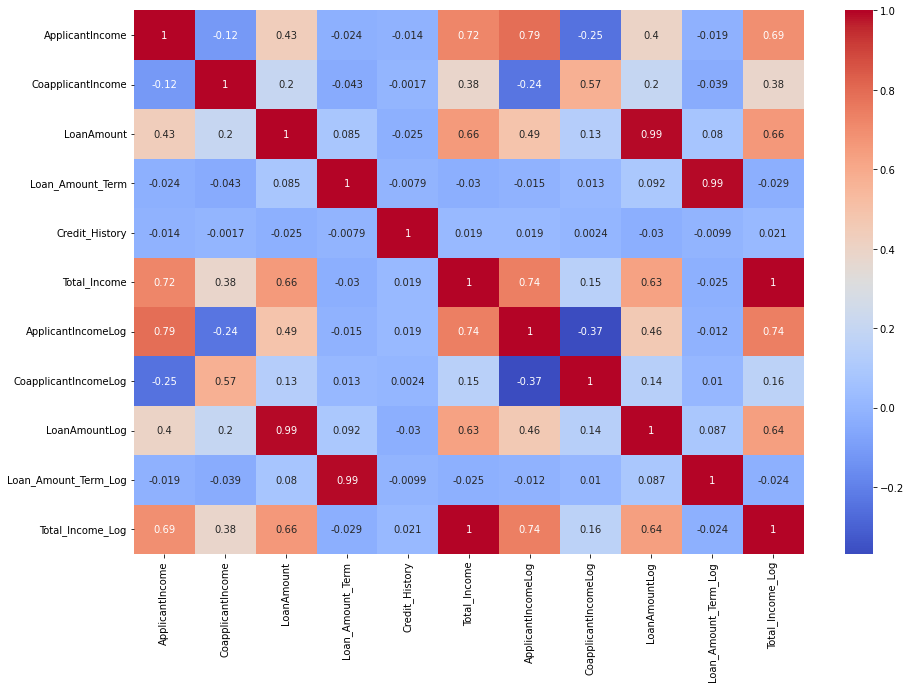

In [440]:
#import pyplot


corr = df.corr()

plt.figure(figsize=(15,10) )

sns.heatmap(corr, annot=True, cmap='coolwarm' )
#increase text size in heatmap


In [441]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,4.986426,5.886104,1.0,Urban,Y,8.674026,8.674197,0.000000,1.789495,1.929505,2.269445
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,4.852030,5.886104,1.0,Rural,N,8.714568,8.430327,7.319202,1.766789,1.929505,2.273627
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,4.189655,5.886104,1.0,Urban,Y,8.006368,8.006701,0.000000,1.646667,1.929505,2.197932
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,4.787492,5.886104,1.0,Urban,Y,8.505323,7.857094,7.765993,1.755699,1.929505,2.251852
4,LP001008,Male,No,0,Graduate,No,6000,0.0,4.948760,5.886104,1.0,Urban,Y,8.699515,8.699681,0.000000,1.783183,1.929505,2.272076


In [442]:
#drop the columns which are not required
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income', 'Loan_ID']
df.drop(cols, axis=1, inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,0.000000,1.789495,1.929505,2.269445
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,7.319202,1.766789,1.929505,2.273627
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,0.000000,1.646667,1.929505,2.197932
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,7.765993,1.755699,1.929505,2.251852
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,0.000000,1.783183,1.929505,2.272076


## Label Encoding

In [443]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender', "Married", "Education", 'Self_Employed', "Property_Area", "Loan_Status", "Dependents"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [444]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674197,0.000000,1.789495,1.929505,2.269445
1,1,1,1,0,0,1.0,0,0,8.430327,7.319202,1.766789,1.929505,2.273627
2,1,1,0,0,1,1.0,2,1,8.006701,0.000000,1.646667,1.929505,2.197932
3,1,1,0,1,0,1.0,2,1,7.857094,7.765993,1.755699,1.929505,2.251852
4,1,0,0,0,0,1.0,2,1,8.699681,0.000000,1.783183,1.929505,2.272076


## Splitting the data for Training and Testing


In [446]:
# specify input and output attributes
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']


In [447]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [448]:
from sklearn.model_selection import cross_val_score

In [449]:
def classify(model , x , y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy: ", model.score(x_test, y_test)*100)
    score = cross_val_score(model, x, y, cv=10)